In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical

import random
     
from keras.layers import Dropout
from keras.layers import Flatten

from tensorflow.keras.layers import Conv2D
#from keras.layers.convolutional import Conv2D

from tensorflow.keras.layers import MaxPooling2D
#from keras.layers.convolutional import MaxPooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

#from google.colab import drive
import glob

2024-05-16 15:29:44.282814: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path = 'Desktop/proyecto integrador/*'

In [3]:
noise = glob.glob("OK_etiquetadas_500-2/*.png")

nonoise = glob.glob("NOK_etiquetadas_500-2/*.png")

In [4]:
len(noise)

500

In [5]:
len(nonoise)

500

In [6]:
noise_Formated = []
nonoise_Formated = []

width = 400 
height = 250
dim = (width, height)

for i in noise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    noise_Formated.append(img_resized)

for i in nonoise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    nonoise_Formated.append(img_resized)

In [7]:
y_noise = np.ones(len(noise_Formated))
y_nonoise = np.zeros(len(nonoise_Formated))

In [8]:
X = np.vstack((noise_Formated,nonoise_Formated))
X.shape

(1000, 250, 400)

In [9]:
y = np.hstack((y_noise,y_nonoise))
y.shape

(1000,)

In [10]:
X=X/255

In [11]:
# 400 x 250 = 100,000
num_pixels = 100000
X = X.reshape(X.shape[0], num_pixels)
print(X.shape)

(1000, 100000)


In [12]:
model = Sequential()
model.add(Dense(units = 50, input_dim=num_pixels, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │     5,000,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,000,670 (19.08 MB)

 Trainable params: 5,000,670 (19.08 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
print(X.shape)
print(y.shape)
print(y)

(1000, 100000)
(1000,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# 25% para el set de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
model = Sequential()
model.add(Dense(units=1, input_dim=100000, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',  metrics=['accuracy', 'precision', 'recall'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=32, epochs=100, 
                 validation_data=(X_test, y_test), shuffle='true')

Epoch 1/100
24/24 - 3s - 142ms/step - accuracy: 0.5533 - loss: 0.6912 - precision: 0.6547 - recall: 0.2407 - val_accuracy: 0.5200 - val_loss: 0.6898 - val_precision: 1.0000 - val_recall: 0.0164
Epoch 2/100
24/24 - 0s - 12ms/step - accuracy: 0.4973 - loss: 0.6872 - precision: 1.0000 - recall: 0.0026 - val_accuracy: 0.5120 - val_loss: 0.6867 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
24/24 - 0s - 13ms/step - accuracy: 0.5027 - loss: 0.6834 - precision: 0.8571 - recall: 0.0159 - val_accuracy: 0.5360 - val_loss: 0.6842 - val_precision: 1.0000 - val_recall: 0.0492
Epoch 4/100
24/24 - 0s - 12ms/step - accuracy: 0.5387 - loss: 0.6799 - precision: 0.8200 - recall: 0.1085 - val_accuracy: 0.5640 - val_loss: 0.6817 - val_precision: 0.8421 - val_recall: 0.1311
Epoch 5/100
24/24 - 0s - 11ms/step - accuracy: 0.5653 - loss: 0.6766 - precision: 0.8250 - recall: 0.1746 - val_accuracy: 0.5680 - val_loss: 0.6792 - val_precision: 0.7500 - val_recall: 0.1721
Epoch 6/100
24/24 - 0s - 1

Epoch 44/100
24/24 - 1s - 27ms/step - accuracy: 0.6973 - loss: 0.6011 - precision: 0.7046 - recall: 0.6878 - val_accuracy: 0.6240 - val_loss: 0.6339 - val_precision: 0.6077 - val_recall: 0.6475
Epoch 45/100
24/24 - 1s - 22ms/step - accuracy: 0.6973 - loss: 0.5998 - precision: 0.7046 - recall: 0.6878 - val_accuracy: 0.6240 - val_loss: 0.6334 - val_precision: 0.6077 - val_recall: 0.6475
Epoch 46/100
24/24 - 0s - 19ms/step - accuracy: 0.6973 - loss: 0.5986 - precision: 0.7046 - recall: 0.6878 - val_accuracy: 0.6280 - val_loss: 0.6329 - val_precision: 0.6107 - val_recall: 0.6557
Epoch 47/100
24/24 - 1s - 22ms/step - accuracy: 0.6973 - loss: 0.5975 - precision: 0.7046 - recall: 0.6878 - val_accuracy: 0.6280 - val_loss: 0.6323 - val_precision: 0.6107 - val_recall: 0.6557
Epoch 48/100
24/24 - 1s - 22ms/step - accuracy: 0.6973 - loss: 0.5964 - precision: 0.7046 - recall: 0.6878 - val_accuracy: 0.6280 - val_loss: 0.6318 - val_precision: 0.6107 - val_recall: 0.6557
Epoch 49/100
24/24 - 0s - 15ms

Epoch 87/100
24/24 - 0s - 13ms/step - accuracy: 0.7053 - loss: 0.5660 - precision: 0.7050 - recall: 0.7143 - val_accuracy: 0.6360 - val_loss: 0.6196 - val_precision: 0.6115 - val_recall: 0.6967
Epoch 88/100
24/24 - 0s - 12ms/step - accuracy: 0.7040 - loss: 0.5654 - precision: 0.7042 - recall: 0.7116 - val_accuracy: 0.6360 - val_loss: 0.6195 - val_precision: 0.6115 - val_recall: 0.6967
Epoch 89/100
24/24 - 0s - 12ms/step - accuracy: 0.7107 - loss: 0.5649 - precision: 0.7080 - recall: 0.7249 - val_accuracy: 0.6360 - val_loss: 0.6194 - val_precision: 0.6099 - val_recall: 0.7049
Epoch 90/100
24/24 - 0s - 17ms/step - accuracy: 0.7147 - loss: 0.5644 - precision: 0.7092 - recall: 0.7354 - val_accuracy: 0.6360 - val_loss: 0.6193 - val_precision: 0.6099 - val_recall: 0.7049
Epoch 91/100
24/24 - 0s - 15ms/step - accuracy: 0.7120 - loss: 0.5639 - precision: 0.7066 - recall: 0.7328 - val_accuracy: 0.6360 - val_loss: 0.6191 - val_precision: 0.6099 - val_recall: 0.7049
Epoch 92/100
24/24 - 0s - 12ms

In [20]:
# resumen del model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │       100,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,005 (1.14 MB)

 Trainable params: 100,001 (390.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 200,004 (781.27 KB)

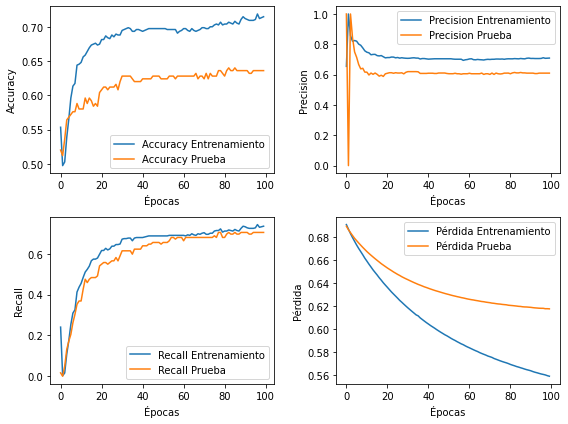

In [22]:
# Obtén los datos del historial
accuracy = hist.history['accuracy']
test_accuracy = hist.history['val_accuracy']

precision = hist.history['precision']
test_precision = hist.history['val_precision']

recall = hist.history['recall']
test_recall = hist.history['val_recall']

loss = hist.history['loss']
test_loss = hist.history['val_loss']


# Crea la figura y los subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Gráfica de accuracy
ax1.plot(accuracy, label='Accuracy Entrenamiento')
ax1.plot(test_accuracy, label='Accuracy Prueba')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Gráfica de precision
ax2.plot(precision, label='Precision Entrenamiento')
ax2.plot(test_precision, label='Precision Prueba')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Precision')
ax2.legend()

# Gráfica de recall
ax3.plot(recall, label='Recall Entrenamiento')
ax3.plot(test_recall, label='Recall Prueba')
ax3.set_xlabel('Épocas')
ax3.set_ylabel('Recall')
ax3.legend()

# Gráfica de pérdida
ax4.plot(loss, label='Pérdida Entrenamiento')
ax4.plot(test_loss, label='Pérdida Prueba')
ax4.set_xlabel('Épocas')
ax4.set_ylabel('Pérdida')
ax4.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()